# Josh Morgan
kNN with class probabilites

# Classes:
0. Acoustic/Folk
1. Alt Music
2. Blues
3. Bollywood
4. Country
5. HipHop
6. Indie Alt
7. Instrumental
8. Metal
9. Pop
10. Rock

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
dataset = pd.read_csv(r"C:\Users\CaptM\OneDrive\Desktop\CSCE 4205\Group Project\train.csv")

# Use this to filter features that you might not want

In [5]:
feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

In [270]:
X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)

# Imputation

In [271]:
imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

# Scaling Data

In [272]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
kNN = KNeighborsClassifier()

# Searching for best parameter

In [274]:
params = {'n_neighbors':[1,5,10,20,30,40,50,60,70,80,90,100]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.48923336131372774
Best Parameters: {'n_neighbors': 30}


# Narrowing the scope of the search

In [275]:
params = {'n_neighbors':[28,29,30,31,32,33,34]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

In [276]:
kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.49090022094863184
Best Parameters: {'n_neighbors': 31}


# Running the most accurate parameter for model

In [277]:
kNN = KNeighborsClassifier(31)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       136
           1       0.20      0.01      0.02       286
           2       0.51      0.33      0.40       281
           3       0.77      0.53      0.63        78
           4       0.52      0.66      0.58        71
           5       0.63      0.63      0.63       262
           6       0.35      0.21      0.26       500
           7       0.77      0.93      0.85       103
           8       0.58      0.45      0.51       382
           9       0.47      0.48      0.48       531
          10       0.43      0.70      0.54       970

    accuracy                           0.49      3600
   macro avg       0.54      0.52      0.51      3600
weighted avg       0.47      0.49      0.46      3600



# Create confusion matrix 

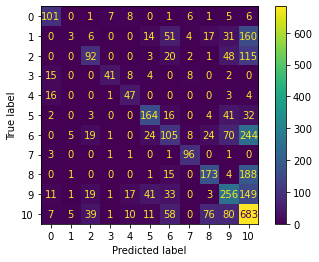

In [278]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

# Narrow down the Classes

In [279]:
# Combining Alt Music, Indie Alt, and Rock
y_train = y_train.replace(to_replace=[1, 6], value=10)
y_test = y_test.replace(to_replace=[1, 6], value=10)

In [280]:
params = {'n_neighbors':[1,5,10,20,30,40,50,60,70,80,90,100]}
kNN_GS = GridSearchCV(estimator=kNN, param_grid=params, scoring='accuracy', cv=5)

kNN_GS.fit(X_train, y_train)

score = kNN_GS.best_score_
params = kNN_GS.best_params_
print('kNN Accuracy:',score)
print('Best Parameters:',params)

kNN Accuracy: 0.6485829377484466
Best Parameters: {'n_neighbors': 30}


# Running the most accurate parameter for model

In [281]:
kNN = KNeighborsClassifier(30)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67       136
           2       0.66      0.19      0.29       281
           3       0.82      0.53      0.64        78
           4       0.51      0.62      0.56        71
           5       0.65      0.58      0.62       262
           7       0.81      0.93      0.87       103
           8       0.70      0.30      0.42       382
           9       0.57      0.30      0.40       531
          10       0.64      0.89      0.75      1756

    accuracy                           0.65      3600
   macro avg       0.67      0.56      0.58      3600
weighted avg       0.65      0.65      0.61      3600



# Create updated confusion matrix

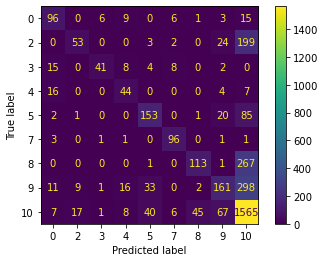

In [282]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

# Account for distance

In [283]:
kNN = KNeighborsClassifier(n_neighbors=30, weights='distance')
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       136
           2       0.57      0.17      0.27       281
           3       0.81      0.54      0.65        78
           4       0.54      0.62      0.58        71
           5       0.68      0.57      0.62       262
           7       0.82      0.94      0.87       103
           8       0.60      0.29      0.39       382
           9       0.50      0.29      0.37       531
          10       0.63      0.86      0.73      1756

    accuracy                           0.63      3600
   macro avg       0.64      0.56      0.57      3600
weighted avg       0.62      0.63      0.59      3600



# "Distance" confusion matrix

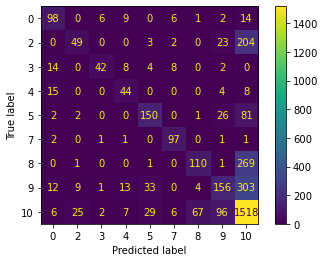

In [284]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

In [19]:
dataset = pd.read_csv(r"C:\Users\CaptM\OneDrive\Desktop\CSCE 4205\Group Project\train.csv")

feature_columns = ['Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature']

X_train, X_test, y_train, y_test = train_test_split(dataset[feature_columns], dataset['Class'], 
                                                    test_size=0.2, random_state=42)
imp_mean = IterativeImputer(random_state=42)
imp_mean.fit(X_train)

X_train = imp_mean.transform(X_train)
X_test = imp_mean.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
kNN = KNeighborsClassifier(n_neighbors=31)
kNN.fit(X_train,y_train)
y_preds = kNN.predict(X_test)
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       136
           1       0.20      0.01      0.02       286
           2       0.51      0.33      0.40       281
           3       0.77      0.53      0.63        78
           4       0.52      0.66      0.58        71
           5       0.63      0.63      0.63       262
           6       0.35      0.21      0.26       500
           7       0.77      0.93      0.85       103
           8       0.58      0.45      0.51       382
           9       0.47      0.48      0.48       531
          10       0.43      0.70      0.54       970

    accuracy                           0.49      3600
   macro avg       0.54      0.52      0.51      3600
weighted avg       0.47      0.49      0.46      3600



# Confusion Matrix: all classes

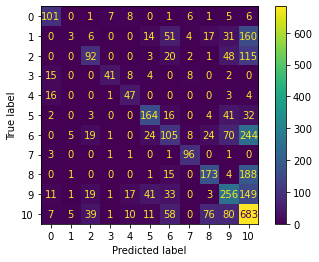

In [21]:
predictions = kNN.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=kNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=kNN.classes_)
disp.plot()
plt.show()

In [22]:
def find_class_name(test):
    name = ""
    if test == 0:
        name = "Acoustic/Folk"
    if test == 1:
        name = "Alt Music"
    if test == 2:
        name = "Blues"
    if test == 3:
        name = "Bollywood"
    if test == 4:
        name = "Country"
    if test == 5:
        name = "HipHop"
    if test == 6:
        name = "Indie Alt"
    if test == 7:
        name = "Instrumental"
    if test == 8:
        name = "Metal"
    if test == 9:
        name = "Pop"
    if test == 10:
        name = "Rock"
    return name

In [30]:
def class_prob(num):
    # predict_proba()
    # Return probability estimates for the test data X
    print("")
    print("{}".format(num+1))
    print("Probability of class:")
    print(kNN.predict_proba(X_test[num:num+1]))
    print("")
    pred = kNN.predict(X_test[num:num+1])
    pred = find_class_name(pred)
    actual = find_class_name(y_test.iloc[num])
    index = y_test.index[num]
    artist = dataset.iloc[index]["Artist Name"]
    song = dataset.iloc[index]["Track Name"]
    print("Artist: {}".format(artist))
    print("Song Name: {}".format(song))
    print("Prediction: {}".format(pred))
    print("Actual: {}".format(actual))
    

In [31]:
for k in range(0,3599):
    class_prob(k)


1
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.77419355
  0.16129032 0.         0.         0.03225806 0.        ]]

Artist: ALLBLACK
Song Name: Ego
Prediction: HipHop
Actual: HipHop

2
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.16129032 0.         0.41935484 0.         0.32258065]]

Artist: Evildead
Song Name: Word of God
Prediction: Metal
Actual: Metal

3
Probability of class:
[[0.38709677 0.         0.06451613 0.19354839 0.12903226 0.
  0.03225806 0.03225806 0.         0.06451613 0.09677419]]

Artist: Jazim Sharma, Tajasvi Sharma
Song Name: Inteha
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

4
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.12903226 0.         0.22580645 0.         0.5483871 ]]

Artist: Vertilizar
Song Name: Nobody's Favorite
Prediction: Rock
Actual: Metal

5
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.03225806

[[0.58064516 0.         0.         0.         0.16129032 0.
  0.         0.12903226 0.         0.06451613 0.06451613]]

Artist: Square One
Song Name: Caamp
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

64
Probability of class:
[[0.         0.06451613 0.         0.         0.35483871 0.
  0.03225806 0.         0.03225806 0.19354839 0.32258065]]

Artist: AC/DC
Song Name: Back In Black
Prediction: Country
Actual: Rock

65
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.12903226 0.         0.51612903 0.         0.25806452]]

Artist: We Were Giants
Song Name: The Final Encounter
Prediction: Metal
Actual: Metal

66
Probability of class:
[[0.         0.12903226 0.16129032 0.         0.         0.
  0.16129032 0.         0.         0.         0.5483871 ]]

Artist: Led Zeppelin
Song Name: Communication Breakdown - Remaster
Prediction: Rock
Actual: Alt Music

67
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.16129032
  0.


115
Probability of class:
[[0.         0.06451613 0.25806452 0.         0.         0.
  0.35483871 0.03225806 0.03225806 0.         0.25806452]]

Artist: Santana
Song Name: Waiting - Live at The Woodstock Music & Art Fair, August 16, 1969
Prediction: Indie Alt
Actual: Rock

116
Probability of class:
[[0.         0.06451613 0.06451613 0.         0.         0.03225806
  0.51612903 0.         0.         0.06451613 0.25806452]]

Artist: Carmella Gross & Wagner
Song Name: ◊™◊û◊ï◊†◊î ◊ê◊ô◊û◊§◊®◊°◊ô◊ï◊†◊ô◊°◊ò◊ô◊™
Prediction: Indie Alt
Actual: Rock

117
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.03225806
  0.29032258 0.         0.         0.19354839 0.32258065]]

Artist: DEVO
Song Name: Whip It
Prediction: Rock
Actual: Rock

118
Probability of class:
[[0.48387097 0.03225806 0.03225806 0.         0.09677419 0.
  0.         0.06451613 0.         0.16129032 0.12903226]]

Artist: Hell Is A Crowded Room
Song Name: Allison Ponthier
Prediction: Acoustic/Folk
Act

Artist: Robbie Williams
Song Name: Feel - Live at Live 8, Hyde Park, London, 2nd July 2005
Prediction: Pop
Actual: Pop

162
Probability of class:
[[0.         0.22580645 0.16129032 0.         0.         0.
  0.12903226 0.         0.03225806 0.29032258 0.16129032]]

Artist: Ehud Banai
Song Name: ◊ë◊ú◊ï◊ñ ◊õ◊†◊¢◊†◊ô
Prediction: Pop
Actual: Rock

163
Probability of class:
[[0.         0.25806452 0.06451613 0.         0.         0.03225806
  0.41935484 0.         0.         0.06451613 0.16129032]]

Artist: EKKSTACY
Song Name: i want to be by your side (feat. herhexx)
Prediction: Indie Alt
Actual: Pop

164
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.03225806
  0.22580645 0.         0.09677419 0.12903226 0.4516129 ]]

Artist: Hurts
Song Name: Wonderful Life
Prediction: Rock
Actual: Rock

165
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.09677419 0.         0.41935484 0.         0.4516129 ]]

Artist: Sepultura
Song N


Artist: Joywave
Song Name: Every Window Is A Mirror
Prediction: Rock
Actual: Pop

209
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.03225806
  0.5483871  0.06451613 0.09677419 0.06451613 0.06451613]]

Artist: Balents
Song Name: One V One
Prediction: Indie Alt
Actual: Indie Alt

210
Probability of class:
[[0.         0.         0.03225806 0.         0.         0.
  0.06451613 0.         0.         0.5483871  0.35483871]]

Artist: Harry Styles
Song Name: Falling
Prediction: Pop
Actual: Pop

211
Probability of class:
[[0.         0.06451613 0.16129032 0.         0.         0.
  0.09677419 0.         0.         0.25806452 0.41935484]]

Artist: Vintage Trouble
Song Name: You Better Believe It
Prediction: Rock
Actual: Blues

212
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.03225806
  0.22580645 0.         0.03225806 0.19354839 0.38709677]]

Artist: Le Tigre
Song Name: Deceptacon
Prediction: Rock
Actual: Alt Music

213
Pr

Artist: Nascent
Song Name: Lock It Up
Prediction: Pop
Actual: HipHop

256
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.09677419 0.         0.35483871 0.         0.41935484]]

Artist: Radkey
Song Name: Seize
Prediction: Rock
Actual: Rock

257
Probability of class:
[[0.         0.12903226 0.16129032 0.         0.         0.03225806
  0.16129032 0.         0.         0.32258065 0.19354839]]

Artist: Stevie Salas
Song Name: Blind
Prediction: Pop
Actual: Rock

258
Probability of class:
[[0.09677419 0.03225806 0.12903226 0.5483871  0.         0.
  0.03225806 0.03225806 0.         0.06451613 0.06451613]]

Artist: Alka Yagnik
Song Name: Aaye Ho Meri Zindagi Mein - Female Version
Prediction: Bollywood
Actual: Bollywood

259
Probability of class:
[[0.         0.22580645 0.         0.         0.         0.16129032
  0.38709677 0.         0.03225806 0.06451613 0.12903226]]

Artist: Thrills in +41
Song Name: Machine Dream
Prediction: Indie Alt
Actual: Indie 

[[0.         0.03225806 0.06451613 0.03225806 0.03225806 0.38709677
  0.25806452 0.         0.         0.16129032 0.03225806]]

Artist: Nego True
Song Name: Pick Your Poison
Prediction: HipHop
Actual: HipHop

305
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.03225806 0.         0.16129032 0.22580645 0.48387097]]

Artist: Bring Me The Horizon
Song Name: Throne
Prediction: Rock
Actual: Metal

306
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.06451613
  0.32258065 0.         0.22580645 0.06451613 0.22580645]]

Artist: Godford
Song Name: Fear
Prediction: Indie Alt
Actual: Indie Alt

307
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.35483871
  0.25806452 0.         0.         0.32258065 0.03225806]]

Artist: Lou Phelps
Song Name: Supersexe Freestyle
Prediction: HipHop
Actual: Alt Music

308
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.1290322

Artist: Tame Impala
Song Name: Breathe Deeper
Prediction: Rock
Actual: Indie Alt

355
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.03225806
  0.29032258 0.         0.12903226 0.06451613 0.35483871]]

Artist: Royal Blood
Song Name: Boilermaker
Prediction: Rock
Actual: Rock

356
Probability of class:
[[0.         0.03225806 0.38709677 0.         0.         0.
  0.12903226 0.         0.         0.06451613 0.38709677]]

Artist: Maya De Vitry
Song Name: When the Memories Come Around
Prediction: Blues
Actual: Alt Music

357
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.25806452 0.         0.06451613 0.16129032 0.48387097]]

Artist: Led Zeppelin
Song Name: Immigrant Song - Remaster
Prediction: Rock
Actual: Alt Music

358
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.19354839 0.         0.35483871 0.         0.35483871]]

Artist: AC/DC
Song Name: Live Wire
Prediction: Metal
Actua

Artist: Stan Getz
Song Name: Pennies From Heaven
Prediction: Indie Alt
Actual: Blues

408
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.06451613
  0.12903226 0.         0.03225806 0.25806452 0.38709677]]

Artist: Madison Beer
Song Name: BOYSHIT
Prediction: Rock
Actual: Pop

409
Probability of class:
[[0.         0.12903226 0.19354839 0.         0.         0.
  0.19354839 0.         0.         0.16129032 0.32258065]]

Artist: Belle Mt.
Song Name: Famous Son
Prediction: Rock
Actual: Alt Music

410
Probability of class:
[[0.22580645 0.         0.         0.70967742 0.03225806 0.
  0.         0.         0.         0.03225806 0.        ]]

Artist: Manna Dey
Song Name: Zindagi Kaisi Hai Paheli
Prediction: Bollywood
Actual: Bollywood

411
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.03225806
  0.16129032 0.         0.32258065 0.12903226 0.32258065]]

Artist: THE DRIVER ERA
Song Name: Preacher Man
Prediction: Metal
Actual: 

  0.09677419 0.         0.         0.51612903 0.06451613]]

Artist: Udit Narayan
Song Name: Ghoongte Mein Chanda
Prediction: Pop
Actual: Bollywood

457
Probability of class:
[[0.         0.         0.         0.         0.         0.77419355
  0.         0.         0.         0.22580645 0.        ]]

Artist: Lil Baby
Song Name: We Paid (feat. 42 Dugg)
Prediction: HipHop
Actual: HipHop

458
Probability of class:
[[0.         0.09677419 0.06451613 0.         0.         0.03225806
  0.19354839 0.         0.         0.4516129  0.16129032]]

Artist: Itay Levi
Song Name: ◊§◊™◊ê◊ï◊ù ◊ê◊î◊ë◊î
Prediction: Pop
Actual: Pop

459
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.03225806
  0.09677419 0.         0.09677419 0.32258065 0.35483871]]

Artist: YONAKA
Song Name: Seize the Power
Prediction: Rock
Actual: Rock

460
Probability of class:
[[0.         0.03225806 0.03225806 0.         0.         0.
  0.09677419 0.         0.38709677 0.06451613 0.38709677]]

Artist

Artist: Tennis
Song Name: Runner
Prediction: Rock
Actual: Indie Alt

508
Probability of class:
[[0.03225806 0.         0.         0.         0.70967742 0.
  0.         0.         0.         0.09677419 0.16129032]]

Artist: Matt Stell
Song Name: Prayed For You
Prediction: Country
Actual: Country

509
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.03225806
  0.         0.         0.41935484 0.03225806 0.38709677]]

Artist: Wizard
Song Name: I Bring Light Into the Dark
Prediction: Metal
Actual: Metal

510
Probability of class:
[[0.03225806 0.06451613 0.         0.         0.         0.
  0.06451613 0.83870968 0.         0.         0.        ]]

Artist: Landon B. Fulton
Song Name: Lineage
Prediction: Instrumental
Actual: Instrumental

511
Probability of class:
[[0.         0.03225806 0.03225806 0.         0.         0.
  0.25806452 0.         0.12903226 0.03225806 0.51612903]]

Artist: Weezer
Song Name: The End of the Game
Prediction: Rock
Actual: Rock

51

Artist: Shannon Curfman
Song Name: Few And Far Between
Prediction: Rock
Actual: Rock

565
Probability of class:
[[0.38709677 0.03225806 0.06451613 0.03225806 0.25806452 0.
  0.         0.09677419 0.         0.03225806 0.09677419]]

Artist: John Conlee
Song Name: Rose Colored Glasses
Prediction: Acoustic/Folk
Actual: Country

566
Probability of class:
[[0.         0.22580645 0.         0.         0.         0.
  0.16129032 0.61290323 0.         0.         0.        ]]

Artist: Carlos Cipa
Song Name: Playful (variation)
Prediction: Instrumental
Actual: Indie Alt

567
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.         0.         0.80645161 0.         0.16129032]]

Artist: Resolve
Song Name: Of Silk and Straw
Prediction: Metal
Actual: Metal

568
Probability of class:
[[0.         0.19354839 0.         0.         0.         0.03225806
  0.4516129  0.         0.12903226 0.03225806 0.16129032]]

Artist: Elkka
Song Name: Euphoric Melodies
Prediction:

Artist: Fleet Foxes
Song Name: Can I Believe You
Prediction: Rock
Actual: Pop

616
Probability of class:
[[0.06451613 0.         0.12903226 0.74193548 0.         0.
  0.         0.         0.         0.03225806 0.03225806]]

Artist: Mahendra Kapoor
Song Name: Jai Janani Jai Bharat Maa
Prediction: Bollywood
Actual: Bollywood

617
Probability of class:
[[0.         0.06451613 0.16129032 0.         0.         0.06451613
  0.12903226 0.         0.         0.16129032 0.41935484]]

Artist: Grateful Dead
Song Name: Althea - 2013 Remaster
Prediction: Rock
Actual: Rock

618
Probability of class:
[[0.19354839 0.         0.03225806 0.06451613 0.51612903 0.
  0.03225806 0.         0.         0.03225806 0.12903226]]

Artist: Chuck Berry
Song Name: Maybellene
Prediction: Country
Actual: Rock

619
Probability of class:
[[0.         0.         0.         0.         0.         0.5483871
  0.19354839 0.         0.         0.16129032 0.09677419]]

Artist: YSN Flow
Song Name: Do It Again (feat. Doe Boy)
P

[[0.         0.12903226 0.         0.         0.         0.
  0.12903226 0.         0.06451613 0.09677419 0.58064516]]

Artist: Nirvana
Song Name: Smells Like Teen Spirit
Prediction: Rock
Actual: Rock

668
Probability of class:
[[0.         0.12903226 0.19354839 0.         0.03225806 0.
  0.32258065 0.         0.         0.16129032 0.16129032]]

Artist: Victor Solf
Song Name: Call Your Grandma
Prediction: Indie Alt
Actual: Indie Alt

669
Probability of class:
[[0.         0.         0.06451613 0.         0.         0.51612903
  0.09677419 0.         0.         0.16129032 0.16129032]]

Artist: Public Enemy
Song Name: Bring The Noise
Prediction: HipHop
Actual: HipHop

670
Probability of class:
[[0.06451613 0.         0.         0.         0.51612903 0.
  0.03225806 0.         0.         0.19354839 0.19354839]]

Artist: Toby Keith
Song Name: Should've Been A Cowboy
Prediction: Country
Actual: Country

671
Probability of class:
[[0.         0.03225806 0.06451613 0.         0.         0.032

  0.         0.96774194 0.         0.         0.        ]]

Artist: Joey Alexander
Song Name: Draw Me Nearer
Prediction: Instrumental
Actual: Instrumental

723
Probability of class:
[[0.         0.19354839 0.         0.         0.         0.35483871
  0.06451613 0.         0.03225806 0.19354839 0.16129032]]

Artist: ◊©◊ù ◊ò◊ï◊ë ◊î◊ê◊ë◊ô
Song Name: ◊°◊ù ◊î◊®◊ì◊û◊î
Prediction: HipHop
Actual: Pop

724
Probability of class:
[[0.         0.16129032 0.09677419 0.         0.03225806 0.
  0.25806452 0.         0.03225806 0.03225806 0.38709677]]

Artist: Genesis Owusu
Song Name: A Song About Fishing
Prediction: Rock
Actual: Indie Alt

725
Probability of class:
[[0.         0.06451613 0.19354839 0.         0.         0.
  0.12903226 0.         0.         0.35483871 0.25806452]]

Artist: Etaoin
Song Name: Bedroom Walls
Prediction: Pop
Actual: Pop

726
Probability of class:
[[0.35483871 0.         0.12903226 0.32258065 0.06451613 0.
  0.03225806 0.         0.         0.03225806 0.06451613]]

Artis

Artist: Charley Crockett
Song Name: Midnight Run
Prediction: Rock
Actual: Alt Music

775
Probability of class:
[[0.         0.19354839 0.03225806 0.         0.         0.03225806
  0.19354839 0.         0.03225806 0.         0.51612903]]

Artist: Sleater-Kinney
Song Name: Worry With You
Prediction: Rock
Actual: Rock

776
Probability of class:
[[0.         0.19354839 0.09677419 0.         0.         0.
  0.22580645 0.         0.03225806 0.06451613 0.38709677]]

Artist: Goat Girl
Song Name: Bang
Prediction: Rock
Actual: Indie Alt

777
Probability of class:
[[0.         0.03225806 0.16129032 0.         0.         0.03225806
  0.16129032 0.         0.         0.5483871  0.06451613]]

Artist: Pheeno
Song Name: Dish
Prediction: Pop
Actual: Pop

778
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.09677419 0.         0.29032258 0.03225806 0.48387097]]

Artist: Mystery Jets
Song Name: Bubblegum
Prediction: Rock
Actual: Indie Alt

779
Probability of class:
[

Artist: The Rolling Stones
Song Name: Paint It Black
Prediction: Rock
Actual: Rock

827
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.03225806
  0.12903226 0.         0.09677419 0.19354839 0.41935484]]

Artist: LILHUDDY
Song Name: The Eulogy of You and Me
Prediction: Rock
Actual: Rock

828
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.03225806
  0.09677419 0.         0.38709677 0.03225806 0.38709677]]

Artist: Opeth
Song Name: Dignity
Prediction: Metal
Actual: Metal

829
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.
  0.09677419 0.         0.03225806 0.12903226 0.58064516]]

Artist: Genesis
Song Name: Follow You Follow Me - Remastered 2007
Prediction: Rock
Actual: Rock

830
Probability of class:
[[0.06451613 0.16129032 0.19354839 0.         0.03225806 0.
  0.12903226 0.         0.06451613 0.06451613 0.29032258]]

Artist: The Goo Goo Dolls
Song Name: Over You
Prediction: Rock
Actual

Prediction: Rock
Actual: Rock

879
Probability of class:
[[0.         0.19354839 0.09677419 0.         0.         0.03225806
  0.12903226 0.         0.09677419 0.09677419 0.35483871]]

Artist: Jean-Luc Ponty
Song Name: The Trans-Love Express
Prediction: Rock
Actual: Rock

880
Probability of class:
[[0.         0.06451613 0.12903226 0.         0.         0.03225806
  0.19354839 0.         0.         0.48387097 0.09677419]]

Artist: INA IVY
Song Name: Pricey
Prediction: Pop
Actual: Pop

881
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.03225806
  0.29032258 0.         0.03225806 0.16129032 0.35483871]]

Artist: Kasabian
Song Name: L.S.F.
Prediction: Rock
Actual: Rock

882
Probability of class:
[[0.         0.12903226 0.35483871 0.         0.         0.03225806
  0.09677419 0.         0.         0.19354839 0.19354839]]

Artist: Brett Dennen
Song Name: Already Gone - Acoustic
Prediction: Blues
Actual: Pop

883
Probability of class:
[[0.         0.03225806

Artist: Pixey
Song Name: The Mersey Line
Prediction: Rock
Actual: Indie Alt

937
Probability of class:
[[0.         0.16129032 0.03225806 0.         0.         0.
  0.19354839 0.         0.06451613 0.12903226 0.41935484]]

Artist: Nia Archives
Song Name: Headz Gone West
Prediction: Rock
Actual: Indie Alt

938
Probability of class:
[[0.         0.         0.41935484 0.         0.         0.03225806
  0.         0.         0.         0.09677419 0.4516129 ]]

Artist: Grateful Dead
Song Name: Ship of Fools - Live at Giants Stadium, East Rutherford, NJ, 6/17/91
Prediction: Rock
Actual: Rock

939
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.03225806 0.         0.87096774 0.         0.06451613]]

Artist: Desaster
Song Name: Endless Awakening
Prediction: Metal
Actual: Metal

940
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.09677419
  0.09677419 0.         0.03225806 0.32258065 0.29032258]]

Artist: Foster The People
S

[[0.         0.19354839 0.         0.         0.         0.09677419
  0.09677419 0.         0.         0.19354839 0.41935484]]

Artist: 070 Shake
Song Name: Guilty Conscience
Prediction: Rock
Actual: Indie Alt

990
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.19354839 0.         0.09677419 0.         0.58064516]]

Artist: Declan McKenna
Song Name: Beautiful Faces
Prediction: Rock
Actual: Rock

991
Probability of class:
[[0.         0.06451613 0.12903226 0.         0.         0.03225806
  0.12903226 0.         0.22580645 0.09677419 0.32258065]]

Artist: Boy & Bear
Song Name: Telescope
Prediction: Rock
Actual: Indie Alt

992
Probability of class:
[[0.         0.03225806 0.06451613 0.         0.         0.32258065
  0.09677419 0.         0.         0.41935484 0.06451613]]

Artist: FCG Heem
Song Name: Beef (feat. Pooh Shiesty)
Prediction: Pop
Actual: HipHop

993
Probability of class:
[[0.         0.06451613 0.12903226 0.         0.         0.0645161

  0.12903226 0.         0.12903226 0.06451613 0.5483871 ]]

Artist: Avenged Sevenfold
Song Name: Bat Country
Prediction: Rock
Actual: Rock

1043
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.12903226 0.         0.19354839 0.06451613 0.48387097]]

Artist: PIG
Song Name: Prey & Obey
Prediction: Rock
Actual: Metal

1044
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.03225806 0.         0.51612903 0.03225806 0.38709677]]

Artist: w. baer
Song Name: I Was Wrong
Prediction: Metal
Actual: Indie Alt

1045
Probability of class:
[[0.         0.03225806 0.16129032 0.         0.         0.03225806
  0.12903226 0.         0.         0.48387097 0.16129032]]

Artist: Natalie Oaks
Song Name: One of A Kind
Prediction: Pop
Actual: Pop

1046
Probability of class:
[[0.         0.         0.32258065 0.         0.         0.06451613
  0.25806452 0.         0.         0.09677419 0.25806452]]

Artist: Los Lobos
Song Name: Framed
Pr

Artist: Ben Sollee
Song Name: Over The Pines
Prediction: Indie Alt
Actual: Alt Music

1100
Probability of class:
[[0.         0.03225806 0.19354839 0.         0.         0.06451613
  0.09677419 0.         0.         0.29032258 0.32258065]]

Artist: Dudu Aharon
Song Name: ◊ë◊ô◊ï◊ù ◊©◊†◊§◊í◊©
Prediction: Rock
Actual: Pop

1101
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.90322581
  0.         0.         0.         0.03225806 0.        ]]

Artist: D Double E
Song Name: Don
Prediction: HipHop
Actual: HipHop

1102
Probability of class:
[[0.         0.06451613 0.19354839 0.         0.         0.
  0.19354839 0.         0.         0.29032258 0.25806452]]

Artist: Bailey Jehl
Song Name: The Way She Does
Prediction: Pop
Actual: Pop

1103
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.61290323
  0.12903226 0.         0.         0.12903226 0.09677419]]

Artist: YG
Song Name: FTP
Prediction: HipHop
Actual: HipHop

1104
Probabili

Artist: girl in red
Song Name: Body And Mind
Prediction: Rock
Actual: Indie Alt

1162
Probability of class:
[[0.         0.22580645 0.16129032 0.         0.         0.
  0.19354839 0.         0.06451613 0.12903226 0.22580645]]

Artist: Tokimeki Records
Song Name: Night Birds (feat. Froya & ÂÆÆËÑáÁøîÂπ≥)
Prediction: Alt Music
Actual: Pop

1163
Probability of class:
[[0.         0.09677419 0.         0.         0.03225806 0.22580645
  0.09677419 0.         0.         0.38709677 0.16129032]]

Artist: Lil Nas X
Song Name: Panini - DaBaby Remix
Prediction: Pop
Actual: Pop

1164
Probability of class:
[[0.         0.03225806 0.03225806 0.         0.         0.03225806
  0.22580645 0.         0.12903226 0.09677419 0.4516129 ]]

Artist: Bryan Adams
Song Name: Tonight We Have The Stars
Prediction: Rock
Actual: Rock

1165
Probability of class:
[[0.         0.09677419 0.06451613 0.         0.         0.03225806
  0.25806452 0.         0.         0.48387097 0.06451613]]

Artist: Omer Adam
Song Name

  0.16129032 0.         0.48387097 0.         0.22580645]]

Artist: Big Ups
Song Name: Goes Black
Prediction: Metal
Actual: Rock

1226
Probability of class:
[[0.         0.09677419 0.12903226 0.         0.         0.
  0.06451613 0.         0.03225806 0.51612903 0.16129032]]

Artist: The Pretty Reckless
Song Name: Make Me Wanna Die - Acoustic Version
Prediction: Pop
Actual: Rock

1227
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.64516129
  0.16129032 0.         0.03225806 0.09677419 0.        ]]

Artist: Metronomy
Song Name: The Bay - Mr. Mitch Remix
Prediction: HipHop
Actual: Alt Music

1228
Probability of class:
[[0.         0.22580645 0.22580645 0.         0.         0.
  0.19354839 0.         0.         0.19354839 0.16129032]]

Artist: November Ultra
Song Name: Miel
Prediction: Alt Music
Actual: Indie Alt

1229
Probability of class:
[[0.         0.         0.03225806 0.         0.         0.
  0.12903226 0.         0.51612903 0.         0.3225806

1290
Probability of class:
[[0.         0.         0.         0.         0.         0.74193548
  0.09677419 0.         0.         0.12903226 0.03225806]]

Artist: Pote Baby
Song Name: Yamacraw Yetti
Prediction: HipHop
Actual: HipHop

1291
Probability of class:
[[0.         0.06451613 0.25806452 0.         0.         0.
  0.06451613 0.         0.03225806 0.06451613 0.51612903]]

Artist: The Steel Woods
Song Name: All of Your Stones
Prediction: Rock
Actual: Alt Music

1292
Probability of class:
[[0.09677419 0.03225806 0.         0.19354839 0.19354839 0.
  0.         0.         0.         0.25806452 0.22580645]]

Artist: The Doors
Song Name: Light My Fire
Prediction: Pop
Actual: Rock

1293
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.12903226 0.         0.22580645 0.06451613 0.48387097]]

Artist: nothing,nowhere.
Song Name: nightmare
Prediction: Rock
Actual: Rock

1294
Probability of class:
[[0.         0.         0.         0.         0.         0

  0.22580645 0.         0.09677419 0.06451613 0.38709677]]

Artist: Raspberries
Song Name: Go All The Way
Prediction: Rock
Actual: Rock

1355
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.35483871
  0.32258065 0.         0.         0.19354839 0.06451613]]

Artist: YG
Song Name: Surgery
Prediction: HipHop
Actual: HipHop

1356
Probability of class:
[[0.         0.         0.         0.         0.         0.77419355
  0.         0.         0.         0.22580645 0.        ]]

Artist: AJ Tracey
Song Name: Dinner Guest (feat. MoStack)
Prediction: HipHop
Actual: Pop

1357
Probability of class:
[[0.67741935 0.         0.         0.09677419 0.06451613 0.
  0.         0.03225806 0.         0.12903226 0.        ]]

Artist: Fly Right
Song Name: Oliver Hazard
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

1358
Probability of class:
[[0.         0.06451613 0.12903226 0.         0.         0.03225806
  0.22580645 0.         0.06451613 0.09677419 0.38709677]]

Arti

Artist: Tides From Nebula
Song Name: Paratyphoid Fever
Prediction: Metal
Actual: Metal

1416
Probability of class:
[[0.         0.16129032 0.16129032 0.         0.         0.
  0.16129032 0.         0.09677419 0.03225806 0.38709677]]

Artist: Aviv Geffen
Song Name: ◊¢◊ï◊†◊ï◊™
Prediction: Rock
Actual: Rock

1417
Probability of class:
[[0.         0.12903226 0.03225806 0.         0.         0.
  0.09677419 0.         0.12903226 0.         0.61290323]]

Artist: Mondo Cozmo
Song Name: Come On
Prediction: Rock
Actual: Alt Music

1418
Probability of class:
[[0.         0.         0.03225806 0.         0.         0.80645161
  0.         0.         0.         0.12903226 0.03225806]]

Artist: Kojey Radical
Song Name: No Gangster
Prediction: HipHop
Actual: HipHop

1419
Probability of class:
[[0.         0.16129032 0.09677419 0.         0.         0.
  0.06451613 0.         0.25806452 0.03225806 0.38709677]]

Artist: Bon Jovi
Song Name: Beautiful Drug
Prediction: Rock
Actual: Rock

1420
Probabili

Artist: Path of Destiny
Song Name: The Division of a Spiral Synergy
Prediction: Metal
Actual: Metal

1473
Probability of class:
[[0.         0.16129032 0.09677419 0.         0.         0.
  0.06451613 0.         0.         0.29032258 0.38709677]]

Artist: Keb' Mo'
Song Name: The Medicine Man [Feat. Old Crow Medicine Show]
Prediction: Rock
Actual: Alt Music

1474
Probability of class:
[[0.83870968 0.         0.         0.03225806 0.03225806 0.
  0.03225806 0.06451613 0.         0.         0.        ]]

Artist: Lissie
Song Name: Best Days - Acoustic
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

1475
Probability of class:
[[0.         0.12903226 0.03225806 0.         0.         0.
  0.12903226 0.         0.4516129  0.         0.25806452]]

Artist: Nothing
Song Name: Zero Day
Prediction: Metal
Actual: Indie Alt

1476
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.16129032 0.         0.03225806 0.06451613 0.64516129]]

Artist: Mumford & Sons
Song Na

[[0.         0.09677419 0.         0.         0.         0.41935484
  0.06451613 0.         0.03225806 0.19354839 0.19354839]]

Artist: N.O.R.E.
Song Name: Superthug
Prediction: HipHop
Actual: HipHop

1528
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.16129032 0.         0.19354839 0.03225806 0.51612903]]

Artist: Tigercub
Song Name: Stop Beating on My Heart (Like a Bass Drum)
Prediction: Rock
Actual: Alt Music

1529
Probability of class:
[[0.03225806 0.09677419 0.         0.         0.09677419 0.06451613
  0.09677419 0.         0.03225806 0.38709677 0.19354839]]

Artist: Britney Spears
Song Name: Radar
Prediction: Pop
Actual: Pop

1530
Probability of class:
[[0.         0.03225806 0.19354839 0.         0.         0.
  0.06451613 0.         0.19354839 0.         0.51612903]]

Artist: Mazzy Star
Song Name: She Hangs Brightly
Prediction: Rock
Actual: Indie Alt

1531
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
 

Song Name: Million Dolla Steppaz
Prediction: HipHop
Actual: HipHop

1588
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.12903226 0.         0.4516129  0.         0.32258065]]

Artist: Truckfighters
Song Name: Desert Cruiser
Prediction: Metal
Actual: Metal

1589
Probability of class:
[[0.         0.25806452 0.03225806 0.         0.         0.
  0.48387097 0.         0.09677419 0.03225806 0.09677419]]

Artist: RETRIEVER
Song Name: Weekend Spiders
Prediction: Indie Alt
Actual: Indie Alt

1590
Probability of class:
[[0.         0.03225806 0.06451613 0.         0.         0.29032258
  0.06451613 0.         0.03225806 0.09677419 0.41935484]]

Artist: Dumpstaphunk
Song Name: In Time
Prediction: Rock
Actual: Blues

1591
Probability of class:
[[0.         0.22580645 0.         0.         0.         0.03225806
  0.22580645 0.         0.06451613 0.12903226 0.32258065]]

Artist: O.C.
Song Name: Time's Up
Prediction: Rock
Actual: HipHop

1592
Probability of cl

Artist: Griff
Song Name: Black Hole - Acoustic Version
Prediction: Pop
Actual: Pop

1645
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.
  0.09677419 0.         0.03225806 0.38709677 0.35483871]]

Artist: Barenaked Ladies
Song Name: One Week
Prediction: Pop
Actual: Rock

1646
Probability of class:
[[0.06451613 0.         0.         0.         0.         0.
  0.         0.93548387 0.         0.         0.        ]]

Artist: Rannar Sillard
Song Name: From Here We Can See
Prediction: Instrumental
Actual: Instrumental

1647
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.48387097
  0.12903226 0.         0.         0.12903226 0.19354839]]

Artist: Zivert
Song Name: Life
Prediction: HipHop
Actual: Pop

1648
Probability of class:
[[0.         0.09677419 0.29032258 0.         0.         0.
  0.06451613 0.         0.         0.19354839 0.35483871]]

Artist: Jagguar
Song Name: Guessing in a Row
Prediction: Rock
Actual: Indie Alt


[[0.51612903 0.         0.         0.16129032 0.19354839 0.
  0.03225806 0.03225806 0.         0.06451613 0.        ]]

Artist: Jasmine Thompson
Song Name: Rather Be
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

1701
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.25806452
  0.19354839 0.         0.         0.41935484 0.06451613]]

Artist: Na√Øka
Song Name: Sauce
Prediction: Pop
Actual: Pop

1702
Probability of class:
[[0.         0.         0.         0.         0.         0.
  0.06451613 0.         0.06451613 0.12903226 0.74193548]]

Artist: Elton John
Song Name: Tiny Dancer
Prediction: Rock
Actual: Pop

1703
Probability of class:
[[0.         0.06451613 0.09677419 0.         0.         0.
  0.19354839 0.         0.22580645 0.03225806 0.38709677]]

Artist: M83
Song Name: Kim & Jessie
Prediction: Rock
Actual: Rock

1704
Probability of class:
[[0.         0.09677419 0.09677419 0.         0.         0.03225806
  0.22580645 0.         0.03225806 0.0645

[[0.         0.03225806 0.03225806 0.         0.         0.
  0.09677419 0.         0.35483871 0.         0.48387097]]

Artist: Maria Brink
Song Name: Meet Me In Fire [Feat. Andy Biersack]
Prediction: Rock
Actual: Rock

1756
Probability of class:
[[0.51612903 0.         0.         0.22580645 0.09677419 0.
  0.03225806 0.         0.         0.09677419 0.03225806]]

Artist: Kishore Kumar
Song Name: Manzilen Apni Jagah Hai
Prediction: Acoustic/Folk
Actual: Bollywood

1757
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.16129032 0.         0.29032258 0.         0.51612903]]

Artist: Penfold
Song Name: M
Prediction: Rock
Actual: Rock

1758
Probability of class:
[[0.         0.06451613 0.12903226 0.         0.         0.03225806
  0.06451613 0.         0.16129032 0.06451613 0.48387097]]

Artist: Spike 1000
Song Name: Make Me Suffer
Prediction: Rock
Actual: Metal

1759
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.0

Song Name: Thumb A Ride
Prediction: Blues
Actual: Blues

1812
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.25806452 0.         0.29032258 0.         0.32258065]]

Artist: bloody/bath
Song Name: Arp-87
Prediction: Rock
Actual: Indie Alt

1813
Probability of class:
[[0.         0.16129032 0.22580645 0.         0.         0.03225806
  0.19354839 0.         0.         0.09677419 0.29032258]]

Artist: Yuval Dayan
Song Name: ◊î◊°◊ï◊£ ◊î◊ò◊ï◊ë ◊î◊ñ◊î
Prediction: Rock
Actual: Pop

1814
Probability of class:
[[0.         0.         0.16129032 0.         0.         0.03225806
  0.16129032 0.         0.12903226 0.03225806 0.48387097]]

Artist: Yes
Song Name: Close to the Edge (i. The Solid Time of Change, ii. Total Mass Retain, iii. I Get up I Get Down, iv. Seasons of Man) - 2003 Remaster
Prediction: Rock
Actual: Rock

1815
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.
  0.16129032 0.         0.         0.29032258 0.4193

  0.06451613 0.         0.         0.19354839 0.        ]]

Artist: LPB Poody
Song Name: Batman
Prediction: HipHop
Actual: HipHop

1870
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.06451613
  0.29032258 0.         0.         0.38709677 0.12903226]]

Artist: Ginger Root
Song Name: Two Step
Prediction: Pop
Actual: Indie Alt

1871
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.16129032 0.         0.29032258 0.         0.4516129 ]]

Artist: Diamond Head
Song Name: It's Electric
Prediction: Rock
Actual: Metal

1872
Probability of class:
[[0.         0.19354839 0.06451613 0.         0.         0.09677419
  0.19354839 0.         0.         0.12903226 0.32258065]]

Artist: Jack Harlow
Song Name: Luv Is Dro (feat. Static Major & Bryson Tiller)
Prediction: Rock
Actual: HipHop

1873
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.03225806 0.         0.19354839 0.22580645 0.4516129 ]]



[[0.         0.09677419 0.03225806 0.         0.         0.
  0.16129032 0.         0.32258065 0.         0.38709677]]

Artist: Mallory Knox
Song Name: Ghost in the Mirror
Prediction: Rock
Actual: Rock

1921
Probability of class:
[[0.         0.03225806 0.06451613 0.         0.         0.16129032
  0.09677419 0.         0.         0.51612903 0.12903226]]

Artist: Empire of the Sun
Song Name: Walking On A Dream
Prediction: Pop
Actual: Pop

1922
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.4516129
  0.12903226 0.         0.         0.12903226 0.22580645]]

Artist: City Girls
Song Name: Twerkulator
Prediction: HipHop
Actual: HipHop

1923
Probability of class:
[[0.35483871 0.09677419 0.06451613 0.06451613 0.16129032 0.
  0.         0.         0.         0.03225806 0.22580645]]

Artist: The Desperate Kingdom of Love
Song Name: Max Jury, Fenne Lily
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

1924
Probability of class:
[[0.         0.         0.0322580

[[0.         0.         0.16129032 0.         0.         0.
  0.12903226 0.         0.32258065 0.         0.38709677]]

Artist: King Crimson
Song Name: Starless
Prediction: Rock
Actual: Rock

1983
Probability of class:
[[0.         0.12903226 0.06451613 0.         0.         0.
  0.03225806 0.         0.03225806 0.29032258 0.4516129 ]]

Artist: Martika
Song Name: Toy Soldiers
Prediction: Rock
Actual: Rock

1984
Probability of class:
[[0.         0.22580645 0.         0.         0.         0.
  0.32258065 0.38709677 0.03225806 0.         0.03225806]]

Artist: Patrick Belaga
Song Name: The Tunnel Is A Tower
Prediction: Instrumental
Actual: Indie Alt

1985
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.09677419 0.         0.25806452 0.06451613 0.4516129 ]]

Artist: Godsmack
Song Name: Bulletproof
Prediction: Rock
Actual: Rock

1986
Probability of class:
[[0.         0.06451613 0.09677419 0.         0.         0.
  0.32258065 0.         0.06451613 0.0

Artist: Saxon
Song Name: Princess of the Night
Prediction: Rock
Actual: Metal

2035
Probability of class:
[[0.         0.09677419 0.09677419 0.         0.         0.03225806
  0.25806452 0.         0.         0.09677419 0.41935484]]

Artist: Eels
Song Name: Mr. E's Beautiful Blues
Prediction: Rock
Actual: Rock

2036
Probability of class:
[[0.4516129  0.         0.         0.06451613 0.12903226 0.
  0.03225806 0.22580645 0.         0.09677419 0.        ]]

Artist: Róisín O
Song Name: Lose You to Love Me
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

2037
Probability of class:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]

Artist: Pearl Street Trio
Song Name: Dreamsville
Prediction: Instrumental
Actual: Instrumental

2038
Probability of class:
[[0.         0.03225806 0.03225806 0.         0.06451613 0.
  0.09677419 0.         0.03225806 0.35483871 0.38709677]]

Artist: Tim McGraw
Song Name: I Like It, I Love It
Prediction: Rock
Actual: Country

2039
Probability of class:
[[0.         0.06451613

[[0.         0.12903226 0.         0.         0.         0.
  0.35483871 0.         0.         0.32258065 0.19354839]]

Artist: Jeremy Zucker
Song Name: emily
Prediction: Indie Alt
Actual: Pop

2085
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.74193548
  0.12903226 0.         0.         0.06451613 0.03225806]]

Artist: Benny The Butcher
Song Name: Price of Fame
Prediction: HipHop
Actual: HipHop

2086
Probability of class:
[[0.         0.         0.         0.         0.         0.06451613
  0.03225806 0.         0.41935484 0.12903226 0.35483871]]

Artist: Lamb of God
Song Name: Ghost Walking
Prediction: Metal
Actual: Metal

2087
Probability of class:
[[0.06451613 0.         0.06451613 0.70967742 0.03225806 0.
  0.         0.03225806 0.         0.         0.09677419]]

Artist: Suresh Wadkar, Nitin Mukesh
Song Name: Tu Mujhe Suna
Prediction: Bollywood
Actual: Bollywood

2088
Probability of class:
[[0.         0.09677419 0.16129032 0.03225806 0.        

Artist: Lee Fields & The Expressions
Song Name: Two Timer
Prediction: Rock
Actual: Pop

2137
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.16129032 0.         0.64516129 0.         0.09677419]]

Artist: Liquorworks
Song Name: Then To Hell With You
Prediction: Metal
Actual: Metal

2138
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.
  0.16129032 0.         0.16129032 0.         0.5483871 ]]

Artist: Pretty Maids
Song Name: Sickening
Prediction: Rock
Actual: Metal

2139
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.5483871
  0.06451613 0.         0.         0.29032258 0.03225806]]

Artist: Moe
Song Name: Walkin On Water
Prediction: HipHop
Actual: HipHop

2140
Probability of class:
[[0.         0.09677419 0.09677419 0.         0.         0.03225806
  0.29032258 0.         0.         0.16129032 0.32258065]]

Artist: Mike Zito
Song Name: Death Row
Prediction: Rock
Actual: Blues

2141

Prediction: Rock
Actual: Blues

2191
Probability of class:
[[0.         0.         0.         0.         0.         0.03225806
  0.19354839 0.         0.35483871 0.03225806 0.38709677]]

Artist: September Mourning
Song Name: Wake The Dead
Prediction: Rock
Actual: Metal

2192
Probability of class:
[[0.         0.03225806 0.09677419 0.         0.         0.03225806
  0.12903226 0.         0.03225806 0.25806452 0.41935484]]

Artist: BARON.E
Song Name: S√âMANTIQUE
Prediction: Rock
Actual: Indie Alt

2193
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.
  0.12903226 0.         0.19354839 0.03225806 0.48387097]]

Artist: Kaiser Chiefs
Song Name: Never Miss A Beat
Prediction: Rock
Actual: Rock

2194
Probability of class:
[[0.         0.06451613 0.22580645 0.         0.         0.03225806
  0.09677419 0.         0.         0.19354839 0.38709677]]

Artist: Curtis Harding
Song Name: Hopeful
Prediction: Rock
Actual: Pop

2195
Probability of class:
[[0.         0.0

Artist: Ondo Fudd
Song Name: Blue Dot
Prediction: Rock
Actual: Indie Alt

2243
Probability of class:
[[0.         0.09677419 0.09677419 0.         0.         0.06451613
  0.25806452 0.         0.03225806 0.06451613 0.38709677]]

Artist: Emily Nenni
Song Name: Long Game
Prediction: Rock
Actual: Alt Music

2244
Probability of class:
[[0.         0.16129032 0.03225806 0.         0.         0.
  0.16129032 0.         0.25806452 0.         0.38709677]]

Artist: Frank Carter & The Rattlesnakes
Song Name: Battlefield
Prediction: Rock
Actual: Indie Alt

2245
Probability of class:
[[0.         0.09677419 0.06451613 0.         0.         0.
  0.19354839 0.         0.09677419 0.03225806 0.51612903]]

Artist: Steppenwolf
Song Name: Born To Be Wild
Prediction: Rock
Actual: Rock

2246
Probability of class:
[[0.         0.12903226 0.09677419 0.         0.         0.
  0.16129032 0.         0.12903226 0.09677419 0.38709677]]

Artist: Jack White
Song Name: Over and Over and Over
Prediction: Rock
Actual

Actual: Pop

2292
Probability of class:
[[0.4516129  0.03225806 0.         0.06451613 0.25806452 0.
  0.09677419 0.03225806 0.         0.06451613 0.        ]]

Artist: James TW
Song Name: When You Love Someone - Acoustic
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

2293
Probability of class:
[[0.         0.16129032 0.03225806 0.         0.         0.
  0.03225806 0.         0.09677419 0.25806452 0.41935484]]

Artist: 3 Doors Down
Song Name: Kryptonite
Prediction: Rock
Actual: Pop

2294
Probability of class:
[[0.         0.06451613 0.32258065 0.         0.         0.
  0.09677419 0.         0.09677419 0.16129032 0.25806452]]

Artist: Walter Trout
Song Name: All Out Of Tears
Prediction: Blues
Actual: Blues

2295
Probability of class:
[[0.         0.12903226 0.09677419 0.         0.         0.
  0.5483871  0.         0.06451613 0.03225806 0.12903226]]

Artist: Ralph Heidel
Song Name: Haut
Prediction: Indie Alt
Actual: Indie Alt

2296
Probability of class:
[[0.25806452 0.03225806 0.   

[[0.         0.09677419 0.         0.         0.         0.
  0.09677419 0.         0.4516129  0.03225806 0.32258065]]

Artist: There For Tomorrow
Song Name: Pages
Prediction: Metal
Actual: Rock

2345
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.
  0.03225806 0.90322581 0.         0.         0.        ]]

Artist: Franz Schubert, Tanguy de Williencourt, Bruno Philippe
Song Name: Ständchen, D. 889
Prediction: Instrumental
Actual: Instrumental

2346
Probability of class:
[[0.         0.16129032 0.03225806 0.         0.         0.03225806
  0.12903226 0.         0.03225806 0.29032258 0.32258065]]

Artist: Lilly Wood and The Prick
Song Name: In Love for the Last Time
Prediction: Rock
Actual: Indie Alt

2347
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.
  0.29032258 0.         0.09677419 0.22580645 0.32258065]]

Artist: Bomba Est√©reo
Song Name: Deja
Prediction: Rock
Actual: Alt Music

2348
Probability of class:
[[0.    

  0.12903226 0.         0.         0.09677419 0.4516129 ]]

Artist: Marillion
Song Name: Kayleigh
Prediction: Rock
Actual: Rock

2395
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.19354839
  0.06451613 0.         0.         0.61290323 0.06451613]]

Artist: Machine Gun Kelly
Song Name: my ex's best friend (with blackbear)
Prediction: Pop
Actual: Rock

2396
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.
  0.09677419 0.         0.19354839 0.09677419 0.5483871 ]]

Artist: The Kooks
Song Name: Naive
Prediction: Rock
Actual: Indie Alt

2397
Probability of class:
[[0.         0.19354839 0.         0.         0.         0.06451613
  0.25806452 0.         0.03225806 0.32258065 0.12903226]]

Artist: Sipper
Song Name: woah
Prediction: Pop
Actual: Alt Music

2398
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.19354839 0.         0.09677419 0.06451613 0.5483871 ]]

Artist: Primal Scream
Song

  0.25806452 0.         0.         0.06451613 0.35483871]]

Artist: House Of Lords
Song Name: Can‚Äôt Find My Way Home
Prediction: Rock
Actual: Rock

2451
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.12903226
  0.06451613 0.         0.48387097 0.         0.29032258]]

Artist: Riot Ten
Song Name: Ready For War (feat. Joe Buras of Born Of Osiris)
Prediction: Metal
Actual: Rock

2452
Probability of class:
[[0.32258065 0.03225806 0.03225806 0.12903226 0.25806452 0.
  0.09677419 0.         0.         0.09677419 0.03225806]]

Artist: Jamie Lawson
Song Name: Can't See Straight - Acoustic
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

2453
Probability of class:
[[0.         0.16129032 0.         0.03225806 0.         0.12903226
  0.29032258 0.         0.         0.32258065 0.06451613]]

Artist: LoveLeo
Song Name: BUZZCUT (feat. blackwinterwells)
Prediction: Pop
Actual: Alt Music

2454
Probability of class:
[[0.         0.09677419 0.16129032 0.         0.  

  0.03225806 0.         0.25806452 0.19354839 0.4516129 ]]

Artist: Teramaze
Song Name: Stone
Prediction: Rock
Actual: Metal

2508
Probability of class:
[[0.         0.09677419 0.32258065 0.         0.         0.
  0.09677419 0.         0.06451613 0.09677419 0.32258065]]

Artist: Andrew "Jr Boy" Jones
Song Name: Whiskey Drinkin' Blues
Prediction: Blues
Actual: Blues

2509
Probability of class:
[[0.64516129 0.         0.         0.06451613 0.         0.06451613
  0.         0.         0.03225806 0.16129032 0.03225806]]

Artist: Ben Howard
Song Name: Only Love
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

2510
Probability of class:
[[0.         0.12903226 0.12903226 0.         0.         0.03225806
  0.16129032 0.         0.         0.38709677 0.16129032]]

Artist: The Doors
Song Name: People Are Strange - New Stereo Mix
Prediction: Pop
Actual: Indie Alt

2511
Probability of class:
[[0.         0.09677419 0.06451613 0.         0.         0.
  0.12903226 0.         0.19354839 0.       

Artist: A. G. Cook
Song Name: Jumper
Prediction: Indie Alt
Actual: Indie Alt

2554
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.64516129
  0.         0.         0.03225806 0.06451613 0.22580645]]

Artist: girl in red
Song Name: Serotonin
Prediction: HipHop
Actual: Alt Music

2555
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.12903226 0.         0.19354839 0.03225806 0.5483871 ]]

Artist: shame
Song Name: Alphabet
Prediction: Rock
Actual: Alt Music

2556
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.06451613
  0.09677419 0.         0.29032258 0.09677419 0.35483871]]

Artist: Duran Duran
Song Name: INVISIBLE
Prediction: Rock
Actual: Rock

2557
Probability of class:
[[0.03225806 0.09677419 0.         0.16129032 0.06451613 0.
  0.09677419 0.03225806 0.         0.32258065 0.19354839]]

Artist: Kingsmen
Song Name: Louie Louie
Prediction: Pop
Actual: Rock

2558
Probability of class:


Probability of class:
[[0.         0.09677419 0.         0.         0.         0.25806452
  0.09677419 0.         0.16129032 0.16129032 0.22580645]]

Artist: FEVER 333
Song Name: (The First Stone) Changes [feat. Yelawolf]
Prediction: HipHop
Actual: Rock

2602
Probability of class:
[[0.         0.16129032 0.09677419 0.         0.         0.06451613
  0.12903226 0.         0.09677419 0.03225806 0.41935484]]

Artist: Sea Girls
Song Name: Forever
Prediction: Rock
Actual: Rock

2603
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.
  0.09677419 0.         0.41935484 0.03225806 0.38709677]]

Artist: Lonely Robot
Song Name: Keeping People as Pets
Prediction: Metal
Actual: Rock

2604
Probability of class:
[[0.22580645 0.         0.         0.5483871  0.         0.
  0.         0.09677419 0.03225806 0.03225806 0.06451613]]

Artist: A Mermaid in Lisbon
Song Name: Patrick Watson, Teresa Salgueiro
Prediction: Bollywood
Actual: Acoustic/Folk

2605
Probability of clas

  0.16129032 0.         0.4516129  0.         0.29032258]]

Artist: Prospective
Song Name: Against All Odds
Prediction: Metal
Actual: Metal

2654
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.
  0.09677419 0.         0.58064516 0.         0.29032258]]

Artist: Judas Priest
Song Name: Night Crawler
Prediction: Metal
Actual: Metal

2655
Probability of class:
[[0.         0.06451613 0.09677419 0.         0.         0.
  0.03225806 0.         0.16129032 0.06451613 0.58064516]]

Artist: Port Noir
Song Name: Old Fashioned
Prediction: Rock
Actual: Rock

2656
Probability of class:
[[0.         0.06451613 0.12903226 0.         0.         0.19354839
  0.22580645 0.         0.03225806 0.22580645 0.12903226]]

Artist: Pop Will Eat Itself
Song Name: Can U Dig It?
Prediction: Indie Alt
Actual: Alt Music

2657
Probability of class:
[[0.19354839 0.06451613 0.06451613 0.03225806 0.         0.
  0.06451613 0.         0.         0.4516129  0.12903226]]

Artist: 220 KID


2707
Probability of class:
[[0.         0.16129032 0.03225806 0.         0.         0.
  0.22580645 0.         0.         0.06451613 0.51612903]]

Artist: Alabama Shakes
Song Name: Hold On
Prediction: Rock
Actual: Rock

2708
Probability of class:
[[0.         0.         0.16129032 0.         0.         0.
  0.09677419 0.         0.25806452 0.16129032 0.32258065]]

Artist: Vintage Blues
Song Name: Blues de un Mal D√≠a
Prediction: Rock
Actual: Blues

2709
Probability of class:
[[0.         0.         0.         0.         0.         0.5483871
  0.06451613 0.         0.         0.35483871 0.03225806]]

Artist: Saweetie
Song Name: Tap In
Prediction: HipHop
Actual: HipHop

2710
Probability of class:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.03225806 0.96774194 0.        ]]

Artist: Phil Collins
Song Name: Against All Odds (Take a Look at Me Now) - Live from the Serious Tour 1990; 2019 Remaster
Prediction: Pop
Actual: Pop

2711
Probability of class

Artist: Alectrona
Song Name: Super Generation
Prediction: Rock
Actual: Rock

2763
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.19354839
  0.29032258 0.         0.         0.32258065 0.09677419]]

Artist: 347aidan
Song Name: Dancing in My Room
Prediction: Pop
Actual: HipHop

2764
Probability of class:
[[0.16129032 0.06451613 0.09677419 0.         0.03225806 0.
  0.32258065 0.         0.         0.25806452 0.06451613]]

Artist: Olivia Dean
Song Name: The Hardest Part
Prediction: Indie Alt
Actual: Pop

2765
Probability of class:
[[0.09677419 0.         0.         0.03225806 0.67741935 0.
  0.         0.         0.         0.03225806 0.16129032]]

Artist: Hank Williams, Jr.
Song Name: Family Tradition
Prediction: Country
Actual: Country

2766
Probability of class:
[[0.06451613 0.03225806 0.32258065 0.         0.09677419 0.03225806
  0.09677419 0.03225806 0.         0.16129032 0.16129032]]

Artist: The Clovers
Song Name: Hey, Miss Fannie - 2007 Remaster
P

  0.16129032 0.         0.32258065 0.         0.38709677]]

Artist: Dream Theater
Song Name: To Tame a Land
Prediction: Rock
Actual: Metal

2817
Probability of class:
[[0.09677419 0.         0.22580645 0.51612903 0.06451613 0.03225806
  0.         0.         0.         0.         0.06451613]]

Artist: Pradeep Kumar
Song Name: Aao Bachcho Tumhen Dikhayeh
Prediction: Bollywood
Actual: Bollywood

2818
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.
  0.19354839 0.         0.06451613 0.         0.58064516]]

Artist: Jane's Addiction
Song Name: Jane Says
Prediction: Rock
Actual: Rock

2819
Probability of class:
[[0.         0.03225806 0.09677419 0.         0.         0.
  0.64516129 0.09677419 0.03225806 0.03225806 0.06451613]]

Artist: Bathtub Cig
Song Name: My Friend
Prediction: Indie Alt
Actual: Indie Alt

2820
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.03225806
  0.09677419 0.         0.12903226 0.16129032 0.5161290

Artist: Tinsley Ellis
Song Name: Nothing But Fine
Prediction: Pop
Actual: Blues

2874
Probability of class:
[[0.         0.         0.12903226 0.         0.         0.
  0.35483871 0.         0.03225806 0.16129032 0.32258065]]

Artist: Adi-Keshet Cohen
Song Name: Battleships
Prediction: Indie Alt
Actual: Indie Alt

2875
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.
  0.16129032 0.         0.22580645 0.03225806 0.4516129 ]]

Artist: Born a New
Song Name: whentheresnobullettobite
Prediction: Rock
Actual: Metal

2876
Probability of class:
[[0.         0.06451613 0.22580645 0.         0.         0.
  0.09677419 0.         0.         0.32258065 0.29032258]]

Artist: Arlo Guthrie
Song Name: Coming into Los Angeles - Remastered
Prediction: Pop
Actual: Rock

2877
Probability of class:
[[0.         0.12903226 0.09677419 0.         0.         0.
  0.35483871 0.         0.06451613 0.03225806 0.32258065]]

Artist: Watertank
Song Name: The Ejector Side
Prediction

Artist: Conway Twitty
Song Name: I'd Love To Lay You Down
Prediction: Country
Actual: Country

2925
Probability of class:
[[0.         0.09677419 0.06451613 0.         0.         0.
  0.12903226 0.         0.19354839 0.03225806 0.48387097]]

Artist: Stepson
Song Name: Deeper Sleep
Prediction: Rock
Actual: Rock

2926
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.29032258 0.         0.06451613 0.29032258 0.25806452]]

Artist: Ella Henderson
Song Name: Ghost
Prediction: Indie Alt
Actual: Pop

2927
Probability of class:
[[0.         0.06451613 0.35483871 0.         0.         0.12903226
  0.12903226 0.         0.         0.19354839 0.12903226]]

Artist: Jazzbois
Song Name: Live & Direct - Live
Prediction: Blues
Actual: HipHop

2928
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.22580645 0.         0.03225806 0.32258065 0.32258065]]

Artist: Bon Iver
Song Name: Holocene
Prediction: Pop
Actual: Indie Alt

2929
Pro

  0.29032258 0.         0.06451613 0.29032258 0.25806452]]

Artist: Love
Song Name: Alone Again Or
Prediction: Indie Alt
Actual: Rock

2978
Probability of class:
[[0.         0.25806452 0.03225806 0.         0.         0.03225806
  0.32258065 0.         0.03225806 0.12903226 0.19354839]]

Artist: The Rolling Stones
Song Name: Bitch - 2009 Mix
Prediction: Indie Alt
Actual: Rock

2979
Probability of class:
[[0.         0.03225806 0.06451613 0.         0.         0.03225806
  0.16129032 0.         0.         0.32258065 0.38709677]]

Artist: Savannah Pope
Song Name: He Sees Me
Prediction: Rock
Actual: Rock

2980
Probability of class:
[[0.         0.16129032 0.09677419 0.         0.         0.
  0.09677419 0.         0.25806452 0.03225806 0.35483871]]

Artist: The dB's
Song Name: Black And White
Prediction: Rock
Actual: Rock

2981
Probability of class:
[[0.         0.06451613 0.29032258 0.         0.         0.03225806
  0.19354839 0.         0.09677419 0.         0.32258065]]

Artist: John

  0.06451613 0.         0.         0.06451613 0.        ]]

Artist: CHIKA
Song Name: SAVE YOU
Prediction: HipHop
Actual: HipHop

3031
Probability of class:
[[0.22580645 0.         0.12903226 0.41935484 0.06451613 0.
  0.         0.         0.         0.16129032 0.        ]]

Artist: Anuradha Paudwal, Kumar Sanu
Song Name: Main Duniya Bhula Doonga
Prediction: Bollywood
Actual: Bollywood

3032
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.03225806
  0.12903226 0.         0.4516129  0.         0.32258065]]

Artist: Thunder
Song Name: Love Walked In
Prediction: Metal
Actual: Rock

3033
Probability of class:
[[0.         0.16129032 0.06451613 0.         0.         0.
  0.09677419 0.         0.12903226 0.03225806 0.51612903]]

Artist: Jeris Johnson
Song Name: One Night
Prediction: Rock
Actual: Alt Music

3034
Probability of class:
[[0.03225806 0.03225806 0.         0.         0.58064516 0.
  0.03225806 0.         0.         0.29032258 0.03225806]]

Artist: 

[[0.         0.         0.22580645 0.         0.         0.32258065
  0.22580645 0.         0.         0.16129032 0.06451613]]

Artist: boy-ish
Song Name: time again
Prediction: HipHop
Actual: Indie Alt

3092
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.03225806 0.         0.32258065 0.03225806 0.51612903]]

Artist: Sammy Hagar
Song Name: Right Now
Prediction: Rock
Actual: Rock

3093
Probability of class:
[[0.         0.16129032 0.06451613 0.         0.         0.
  0.25806452 0.         0.03225806 0.22580645 0.25806452]]

Artist: A. G. Cook
Song Name: Animals
Prediction: Indie Alt
Actual: Indie Alt

3094
Probability of class:
[[0.         0.06451613 0.32258065 0.         0.         0.
  0.03225806 0.         0.09677419 0.22580645 0.25806452]]

Artist: Sue Foley
Song Name: The Ice Queen
Prediction: Blues
Actual: Blues

3095
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.16129032
  0.09677419 0.         0.       

[[0.5483871  0.         0.09677419 0.06451613 0.09677419 0.03225806
  0.06451613 0.         0.         0.03225806 0.06451613]]

Artist: Billy Bragg, Joe Henry
Song Name: Hobo's Lullaby
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

3145
Probability of class:
[[0.         0.16129032 0.         0.         0.         0.
  0.25806452 0.         0.22580645 0.03225806 0.32258065]]

Artist: Silversun Pickups
Song Name: Lazy Eye
Prediction: Rock
Actual: Rock

3146
Probability of class:
[[0.         0.06451613 0.09677419 0.         0.         0.03225806
  0.19354839 0.         0.06451613 0.22580645 0.32258065]]

Artist: ShittyCT
Song Name: Mahapecha Shel Simcha
Prediction: Rock
Actual: Indie Alt

3147
Probability of class:
[[0.         0.06451613 0.         0.         0.         0.
  0.03225806 0.         0.25806452 0.09677419 0.5483871 ]]

Artist: System Of A Down
Song Name: Aerials
Prediction: Rock
Actual: Rock

3148
Probability of class:
[[0.         0.06451613 0.         0.         0.    

Artist: Shire T
Song Name: Blue Kiss
Prediction: Rock
Actual: Alt Music

3200
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.25806452 0.         0.25806452 0.         0.35483871]]

Artist: JAWS
Song Name: Untitled
Prediction: Rock
Actual: Indie Alt

3201
Probability of class:
[[0.70967742 0.         0.         0.06451613 0.12903226 0.
  0.03225806 0.         0.         0.06451613 0.        ]]

Artist: Holly Dunn
Song Name: Daddy's Hands
Prediction: Acoustic/Folk
Actual: Country

3202
Probability of class:
[[0.         0.03225806 0.06451613 0.         0.         0.
  0.03225806 0.         0.19354839 0.03225806 0.64516129]]

Artist: Silver Synthetic
Song Name: Around the Bend
Prediction: Rock
Actual: Rock

3203
Probability of class:
[[0.         0.19354839 0.22580645 0.         0.         0.03225806
  0.06451613 0.         0.         0.25806452 0.22580645]]

Artist: Tuna
Song Name: ◊ê◊†◊®◊í◊ô◊î
Prediction: Pop
Actual: HipHop

3204
Probability of cla

[[0.         0.06451613 0.09677419 0.         0.         0.
  0.12903226 0.         0.29032258 0.         0.41935484]]

Artist: Behemoth
Song Name: Blow Your Trumpets Gabriel
Prediction: Rock
Actual: Metal

3262
Probability of class:
[[0.         0.16129032 0.03225806 0.         0.         0.
  0.51612903 0.         0.03225806 0.         0.25806452]]

Artist: –î—É—Ä–Ω–æ–π –í–∫—É—Å
Song Name: –∑–≤—É–∫ –∏ —Ç–µ–º–Ω–æ—Ç–∞
Prediction: Indie Alt
Actual: Indie Alt

3263
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.03225806
  0.03225806 0.         0.64516129 0.         0.25806452]]

Artist: Mot√∂rhead
Song Name: Thunder & Lightning
Prediction: Metal
Actual: Metal

3264
Probability of class:
[[0.         0.         0.03225806 0.         0.         0.
  0.09677419 0.         0.74193548 0.         0.12903226]]

Artist: Nekromantheon
Song Name: Thanatos
Prediction: Metal
Actual: Metal

3265
Probability of class:
[[0.19354839 0.         0.16129032 0.         0.  

  0.09677419 0.         0.22580645 0.06451613 0.48387097]]

Artist: Guns N' Roses
Song Name: Paradise City
Prediction: Rock
Actual: Rock

3313
Probability of class:
[[0.03225806 0.         0.09677419 0.         0.         0.
  0.06451613 0.         0.03225806 0.32258065 0.4516129 ]]

Artist: nothing,nowhere.
Song Name: pretend
Prediction: Rock
Actual: Rock

3314
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.09677419 0.         0.         0.19354839 0.61290323]]

Artist: Death From Above 1979
Song Name: Freeze Me
Prediction: Rock
Actual: Alt Music

3315
Probability of class:
[[0.         0.12903226 0.03225806 0.         0.         0.12903226
  0.09677419 0.         0.09677419 0.22580645 0.29032258]]

Artist: Peled
Song Name: ◊©◊®◊©◊®◊ô◊ù
Prediction: Rock
Actual: HipHop

3316
Probability of class:
[[0.51612903 0.03225806 0.06451613 0.         0.06451613 0.
  0.06451613 0.22580645 0.         0.03225806 0.        ]]

Artist: Millennial
Song Name: Ais

Artist: Ehud Banai
Song Name: ◊ñ◊≥◊ê◊ü ◊ñ◊≥◊ê◊ß ◊û◊ï◊ü ◊ê◊û◊ô
Prediction: Blues
Actual: Rock

3371
Probability of class:
[[0.         0.09677419 0.06451613 0.         0.         0.58064516
  0.03225806 0.         0.         0.12903226 0.09677419]]

Artist: D Power Diesle
Song Name: D√©j√† vu
Prediction: HipHop
Actual: HipHop

3372
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.
  0.19354839 0.         0.19354839 0.         0.48387097]]

Artist: Make Them Suffer
Song Name: Erase Me
Prediction: Rock
Actual: Metal

3373
Probability of class:
[[0.12903226 0.03225806 0.         0.         0.12903226 0.06451613
  0.06451613 0.         0.         0.38709677 0.19354839]]

Artist: Britney Spears
Song Name: How I Roll
Prediction: Pop
Actual: Pop

3374
Probability of class:
[[0.38709677 0.         0.         0.03225806 0.12903226 0.
  0.03225806 0.         0.03225806 0.32258065 0.06451613]]

Artist: Gowry Lekshmi
Song Name: Ajitha Hare
Prediction: Acoustic/Folk
A

Actual: Blues

3422
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.03225806
  0.22580645 0.         0.22580645 0.03225806 0.35483871]]

Artist: Kasabian
Song Name: Underdog
Prediction: Rock
Actual: Alt Music

3423
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.
  0.03225806 0.         0.25806452 0.06451613 0.5483871 ]]

Artist: Arctic Monkeys
Song Name: When The Sun Goes Down
Prediction: Rock
Actual: Indie Alt

3424
Probability of class:
[[0.         0.09677419 0.22580645 0.         0.         0.
  0.06451613 0.         0.03225806 0.09677419 0.48387097]]

Artist: psykhi
Song Name: White Picket Fence
Prediction: Rock
Actual: Pop

3425
Probability of class:
[[0.06451613 0.         0.         0.         0.         0.
  0.06451613 0.87096774 0.         0.         0.        ]]

Artist: Christopher Varela
Song Name: Deep Forest - Cello Version
Prediction: Instrumental
Actual: Instrumental

3426
Probability of class:
[[0.    

  0.09677419 0.         0.35483871 0.         0.32258065]]

Artist: Candlemass
Song Name: The Pendulum
Prediction: Metal
Actual: Metal

3479
Probability of class:
[[0.         0.22580645 0.         0.         0.         0.
  0.19354839 0.         0.06451613 0.16129032 0.35483871]]

Artist: Kasabian
Song Name: Fire
Prediction: Rock
Actual: Alt Music

3480
Probability of class:
[[0.         0.06451613 0.09677419 0.         0.         0.
  0.09677419 0.         0.29032258 0.03225806 0.41935484]]

Artist: Paradise Lost
Song Name: Hallowed Land
Prediction: Rock
Actual: Metal

3481
Probability of class:
[[0.         0.09677419 0.03225806 0.         0.         0.
  0.03225806 0.         0.16129032 0.         0.67741935]]

Artist: Black Stone Cherry
Song Name: White Trash Millionaire
Prediction: Rock
Actual: Rock

3482
Probability of class:
[[0.         0.03225806 0.         0.         0.         0.12903226
  0.12903226 0.         0.16129032 0.06451613 0.48387097]]

Artist: M√•neskin
Song Name

Actual: Rock

3530
Probability of class:
[[0.         0.06451613 0.03225806 0.         0.         0.
  0.16129032 0.         0.22580645 0.         0.51612903]]

Artist: The Stooges
Song Name: Search and Destroy - Iggy Pop Mix
Prediction: Rock
Actual: Indie Alt

3531
Probability of class:
[[0.         0.         0.22580645 0.         0.         0.03225806
  0.16129032 0.         0.         0.32258065 0.25806452]]

Artist: Eddie 9V
Song Name: 3AM in Chicago
Prediction: Pop
Actual: Blues

3532
Probability of class:
[[0.         0.09677419 0.09677419 0.         0.         0.
  0.22580645 0.         0.06451613 0.29032258 0.22580645]]

Artist: SOAK
Song Name: Bloodbuzz Ohio
Prediction: Pop
Actual: Indie Alt

3533
Probability of class:
[[0.         0.12903226 0.         0.         0.         0.
  0.29032258 0.         0.12903226 0.03225806 0.41935484]]

Artist: Accept
Song Name: Balls to the Wall
Prediction: Rock
Actual: Metal

3534
Probability of class:
[[0.         0.09677419 0.61290323 0. 

[[0.         0.12903226 0.22580645 0.         0.         0.
  0.25806452 0.         0.06451613 0.03225806 0.29032258]]

Artist: Black River Delta
Song Name: Going Down
Prediction: Rock
Actual: Blues

3584
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.03225806
  0.19354839 0.         0.         0.35483871 0.32258065]]

Artist: Jonas Brothers
Song Name: Sucker
Prediction: Pop
Actual: Pop

3585
Probability of class:
[[0.         0.03225806 0.03225806 0.         0.         0.06451613
  0.09677419 0.         0.         0.19354839 0.58064516]]

Artist: Chris Cornell
Song Name: Nothing Compares 2 U - Live At SiriusXM/2015
Prediction: Rock
Actual: Rock

3586
Probability of class:
[[0.5483871  0.         0.         0.         0.12903226 0.
  0.         0.25806452 0.         0.         0.06451613]]

Artist: Arlo Parks
Song Name: Creep
Prediction: Acoustic/Folk
Actual: Acoustic/Folk

3587
Probability of class:
[[0.         0.06451613 0.16129032 0.         0.    

In [32]:
#0-3599 samples that can be used to check prob.
class_prob(946)


947
Probability of class:
[[0.         0.09677419 0.         0.         0.         0.06451613
  0.         0.         0.03225806 0.16129032 0.64516129]]

Artist: Coldplay
Song Name: Yellow
Prediction: Rock
Actual: Pop
